In [29]:
import os
import tensorflow as tf
from dataset import Dataset
from omegaconf import OmegaConf
import re
import time
import pandas as pd

In [3]:
output_path = "outputs\\2024-04-02\\04-11-19\\"
model_name = "model_weights.h5"
cfg = OmegaConf.load(os.path.join(output_path, ".hydra\\config.yaml"))
args = cfg.args
dataset = Dataset(
        num_instances=args.num_instances,
        num_samples_per_class=args.num_samples_per_class,
        object_arr= [x for x in range(10)],
        ucc_start=args.ucc_start,
        ucc_end=args.ucc_end
        )

x_train shape: (40000, 32, 32, 3)
40000 train samples
10000 val samples
object0:0, num_train:4000, num_val:1000
object1:1, num_train:4000, num_val:1000
object2:2, num_train:4000, num_val:1000
object3:3, num_train:4000, num_val:1000
object4:4, num_train:4000, num_val:1000
object5:5, num_train:4000, num_val:1000
object6:6, num_train:4000, num_val:1000
object7:7, num_train:4000, num_val:1000
object8:8, num_train:4000, num_val:1000
object9:9, num_train:4000, num_val:1000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


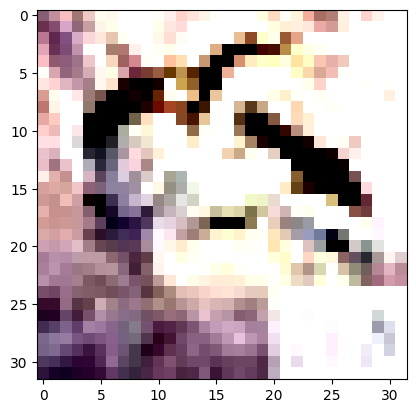

In [31]:
import matplotlib.pyplot as plt

plt.imshow(dataset.next_batch_train()[0][0][3])

In [32]:
val_summary_writer = tf.summary.create_file_writer(
    os.path.join(output_path, "val_logs"))
with open(os.path.join(output_path, "train.log")) as file:
    lines = file.readlines()
    file.close()

data_dict = {
    "step": [],
    "ae_loss": [],
    "ucc_loss": [],
    "ucc_acc": [],
    "weighted_loss": [],
}
for l in lines:
    a = re.search(r"Step.*,", l)
    step = int(l[a.start()+5: a.end()-1])
    data_dict["step"].append(step)
    train_match = re.search(r"training.*eval", l)
    train_string = l[train_match.start()+len("training: "): train_match.end()-len(" eval")]
    eval_match = re.search(r"eval.*", l)
    eval_string = l[eval_match.start()+len("eval: "): eval_match.end()]
    train_losses = train_string.split(" ")
    eval_losses = eval_string.split(" ")
    # for s in train_losses:
    #     loss_match = re.search(r"[a-z].*[a-z]", s)
    #     value_match = re.search(r"[0-9].*[0-9]", s)
    #     loss = (s[loss_match.start():loss_match.end()])
    #     value = float(s[value_match.start():value_match.end()])
    for s in eval_losses:
        loss_match = re.search(r"[a-z].*[a-z]", s)
        value_match = re.search(r"[0-9].*[0-9]", s)
        loss = (s[loss_match.start():loss_match.end()])
        value = float(s[value_match.start():value_match.end()])
        data_dict[loss].append(value)
df = pd.DataFrame(data_dict)

<Axes: >

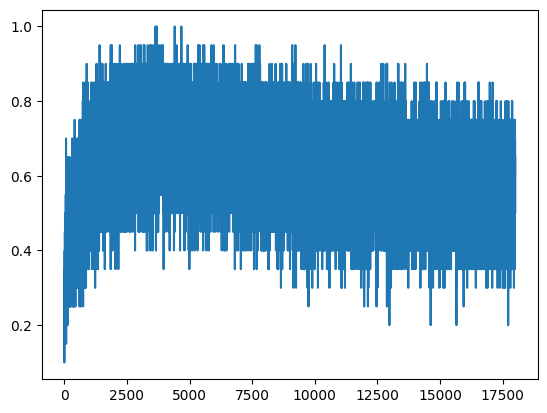

In [37]:
df["ucc_acc"].plot()